Adam Peetz<br>
August 28th 2022 <br>
MSDS680 Week 1 Assignment<br>
Regis University<br>
Professor Nasheb Ismaily

# Preparing data for ML: Heart disease dataset

### Risk of disease through data.
Scientists have shown that a person's risk of developing heart disease can be predicted by other health variables. Attributes such as a person's heart rate, blood pressure, and family history can give an indication of the risk of developing the disease. A dataset of health information, labeled with the presence of heart disease, could be analyzed by a machine learning algorithm to predict a patient's risk of developing the disease. A group of researchers, Janosi et al., created a dataset of health metrics like this in 1988. This dataset will be used to train a machine learning algorithm to predict for the disease.

### Preparing data for ML.
It is rare to find data that is perfectly suited for machine learning. Most data is messy. It contains blank fields, outliers, and features that are not correlated to the prediction variable. Data must be cleaned before it can be presented to a machine learning algorithm. The data in the Janosi et al. (1988) dataset will be cleaned in the notebook below to prepare it for analysis by a machine learning algorithm. <br>

First, exploratory data analysis (EDA) will be performed to guide the cleaning process.



In [1]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder 

In [2]:
#import heart health dataset
heart_df = pd.read_csv('assign_wk1/heart.disease.data', sep=',')

# Objective: Explore the Data with EDA

### Review the raw data.

It is helpful to understand what the data looks like in its raw form. To do this, use df.head() to get a basic idea of what the data in the dataframe looks like.

In [3]:
#show sample of dataset
heart_df.head(3)

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50,20,1,-9,1,2,150,0,6,0
1,67,1,4,160,286,40,40,0,-9,1,2,108,1,3,2
2,67,1,4,120,229,20,35,0,-9,1,2,129,1,7,1


### Describing the dataset.

Df.describe can be used to generate some basic insights into the data.<br>
Df.feature.hist can be used to generate histograms for each feature in the dataset.<br>
Some basic demographic information and insights are:
- There are 282 rows of information in this dataset.
    - 282 is a relatively small dataset, this may make it difficult to train a machine learning algorithm.
- There are 14 features in the dataset, and 1 target variable "num".
- The average age in the dataset is 54. The youngest person is 29, and the oldest is 77.
- Most people in the dataset are men, with almost twice as many men in the dataset as women.
    - The distribution of sex may be problematic. The feature might need to be weighted during machine learning to prevent the algorithm from skewing predictions towards men.


In [4]:
#describe dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,16.460993,14.829787,0.148936,-8.184397,0.620567,1.014184,149.765957,0.326241,4.581560,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,19.580300,15.564563,0.356658,2.741802,0.486108,0.998118,22.923869,0.469670,2.248467,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000,0.000000,71.000000,0.000000,-9.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,10.000000,15.000000,0.000000,-9.000000,1.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,-9.000000,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,99.000000,54.000000,1.000000,1.000000,1.000000,2.000000,202.000000,1.000000,7.000000,4.000000


<AxesSubplot:>

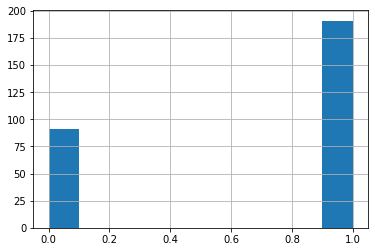

In [5]:
#plot histogram of sex
heart_df.sex.hist()

### Generate a correlation heatmap.

Feature correlation can be used to guide the process of imputing missing values and for understanding which columns to drop in future cleaning steps. A correlation heatmap has been generated to give a rough idea of which features show correlation in the heart disease dataset.

<AxesSubplot:>

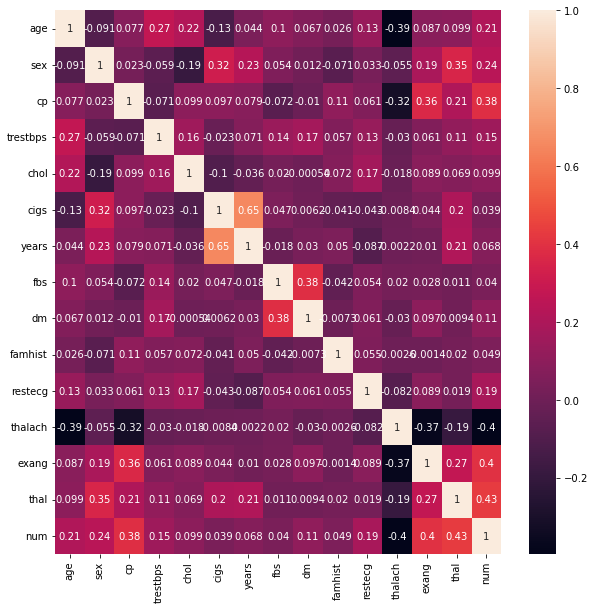

In [6]:
#MSDS650 Classwork
#plot a correlation heatmap
f = plt.figure(figsize=(10, 10))
sns.heatmap(heart_df.corr(), annot=True)

### Counting the number of people with various levels of heart disease.

The "num" column in the dataset is the target variable and identifies the presence of heart disease. 0 means no presence, 1-4 indicate heart disease. A simple count of the dataset shows the presence of various levels of heart disease. There are:
- 157 people without heart disease
- 50 people with level 1 heart disease
- 31 people with level 2 heart disease
- 32 people with level 3 heart disease
- 12 people with level 4 heart disease

<b> Class Imbalance</b><br>
There is a significant class imbalance present in this feature. The class imbalance may effect the ability of a machine learning model to predict for minority classes. This imbalance may need to be addressed in future steps.<br>

<b>Null Information Rate</b><br>
This information can be used to obtain the null accuracy rate, which will be used for comparison of future models.

- Null accuracy rate of 157/282 = 55%

<Figure size 432x288 with 0 Axes>

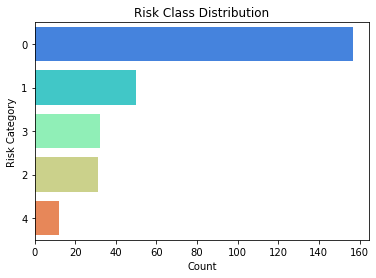

<Figure size 432x288 with 0 Axes>

In [7]:
#group by industry and count, sort for highest value
heartgraph = heart_df.groupby('num').count()
heartgraph['risk_category'] = ['0', '1', '2', '3','4']
heartgraph.sort_values(by='age',inplace=True,ascending=False)

sns.barplot(data=heartgraph,x='age',y='risk_category',palette='rainbow')
plt.ylabel('Risk Category')
plt.xlabel('Count')
plt.title('Risk Class Distribution')

plt.figure()

In [8]:
# group by "num" and show count
heart_df.groupby(['num']).count().sort_values(by='age', ascending=False)

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal
num,,,,,,,,,,,,,,
0,157,157,157,157,157,157,157,157,157,157,157,157,157,157
1,50,50,50,50,50,50,50,50,50,50,50,50,50,50
3,32,32,32,32,32,32,32,32,32,32,32,32,32,32
2,31,31,31,31,31,31,31,31,31,31,31,31,31,31
4,12,12,12,12,12,12,12,12,12,12,12,12,12,12


### Visualizing heart disease against highly correlated variables.

The correlation of heart disease against other features can be shown with a histogram. The variables that showed high correlation age, sex, exang, and thalach. The code for these graphs has been taken from the week 1 MSDS680 lecture.


#### Age

Age is a highly correlated to heart disease. The histograms show that the presence of heart disease goes up as a person gets older. Very few individuals under the age of 40 have heart disease in this dataset.



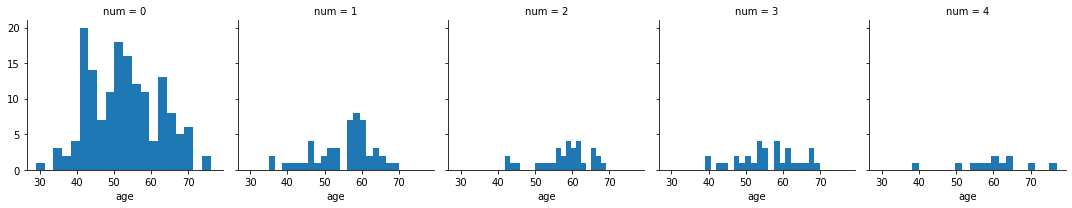

In [9]:
#MSDS680 lecture
#create histogram pivot
g = sns.FacetGrid(heart_df, col='num')
g.map(plt.hist, 'age', bins=20)

#### Sex

Sex was shown as a highly correlated variable. The histograms below illustrate the prevalence of heart disease among men who experienced it at much higher rates than women. Some of this skew may be a result of there being twice as many men in the dataset. As mentioned above, this feature may need to be treated for class imbalance in future steps.

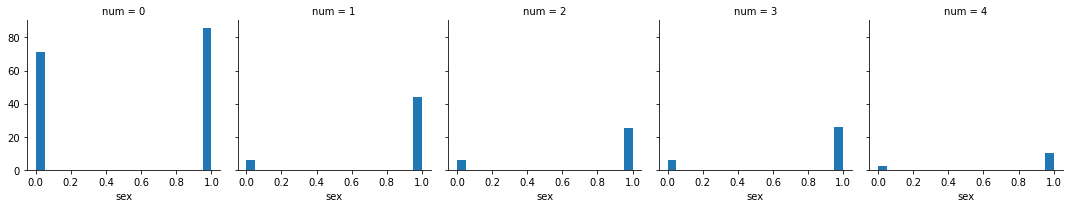

In [10]:
#MSDS680 lecture
#create histogram pivot
g = sns.FacetGrid(heart_df, col='num')
g.map(plt.hist, 'sex', bins=20)

#### Exang

Exang represents exercise induced chest pain. While this feature does show correlation, a few people with no heart disease experience chest pain during exercise, and many people who had heart disease did not any experience chest pain while they exercised. Exang alone will not be able to determine the presence of heart disease.


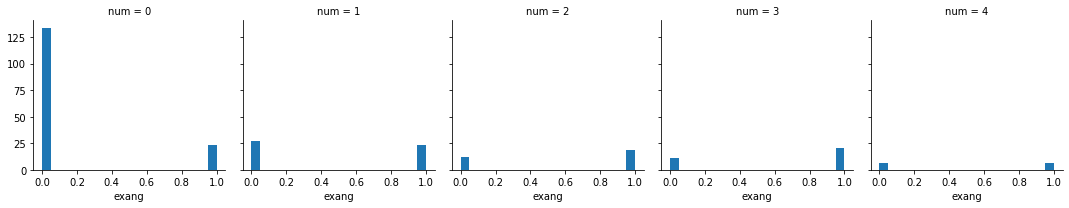

In [11]:
#MSDS680 lecture
#create histogram pivot
g = sns.FacetGrid(heart_df, col='num')
g.map(plt.hist, 'exang', bins=20)

#### Thalach

Thalach represents the maximum heart rate a patient was able to achieve. Many of the patients with heart disease could not achieve high heart rates and some of the lowest heart rates were expressed by people who had heart disease. A person with no risk should be able to sustain a healthy heart rate in the distribution curve shown below. Heart rate will be a helpful feature for the prediction of heart disease in the dataset.


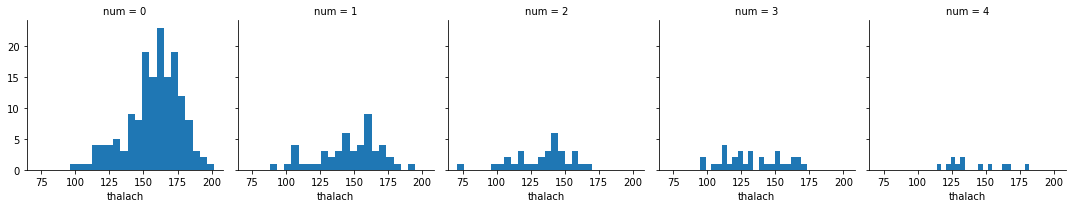

In [12]:
#MSDS680 lecture
#create histogram pivot
g = sns.FacetGrid(heart_df, col='num')
g.map(plt.hist, 'thalach', bins=20)

# Objective: Imputing Filling Values

### What values are missing?

The dataset contains a few features with missing values, as reflected by -9 in the data. The number of rows in each feature with missing values can be determined with a numpy summing operation. <BR>
- "cigs" has 5 null values.
- "years" has 5 null values.
- "dm" has 259 null values.
- "thal" has 2 null values.


In [13]:
# find missing values in columns
np.sum(heart_df == -9)

age           0
sex           0
cp            0
trestbps      0
chol          0
cigs          5
years         5
fbs           0
dm          259
famhist       0
restecg       0
thalach       0
exang         0
thal          2
num           0
dtype: int64

### Filling missing thal values.

Thal is a categorical variable that corresponds to the presence of heart defect in a person. There are only 2 rows missing thal values. The majority of people (56%) in the dataset have no defect under category 3. Category 3 will be imputed for the 2 missing values. Filling thal with the mode of the feature can be done for the small number of missing thal values (less than 1%) without fear of skewing the data in the dataset. <br>

Thal needs to be imputed first to allow missing cigs and years values to be populated in the next step.


In [14]:
#calculate thal mode
countthal_df = heart_df.groupby('thal')['years'].count()
countthal_df.head(4)

thal
-9      2
 3    159
 6     14
 7    107
Name: years, dtype: int64

In [15]:
#fill thal null values with mode
heart_df['thal'] = heart_df['thal'].replace({ -9: 3})


### Imputing cigs and years.

Cigs and years show the highest correlation of any set of features in the dataset. Due to this high correlation, they will be treated together. 

#### years 
Correlation of the cigs and year variables is also shown to the variables sex and thal. The 5 missing values for years will be imputed using the guessing method shown in the MSDS_680 week 1 lecture materials. This method collects the median values for different combinations of thal and sex and inserts those into the dataset for missing values.

In [16]:
#MSDS_680 Week1 Lecture
#Create array to hold guess values
guess_years = np.zeros((2,7))
guess_years

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [17]:
#MSDS_680 Week1 Lecture
#iterate through sex and thal combinations and collect median values to use as guesses
for i in range(0, 2):
    for j in range(0, 7):
        guess_df = heart_df[(heart_df['sex'] == i) & (heart_df['thal'] == j+1)]['years']
        guess_years[i,j] = guess_df.median()
#insert guesses to dataset 
    for i in range(0, 2):
        for j in range(0, 7):
            heart_df.loc[ (heart_df.years == -9 ) & (heart_df.sex == i) & (heart_df.thal == j+1),\
                    'years'] = guess_years[i,j]

#### cigs

The number of cigs is correlated to the number of years a person has smoked. The missing values for cigs will be filled with the mean value for the number of years a person has smoked. Fortunately, the number of years for missing cig values is equal to 0, or 1. <br>

For persons who have smoked 0 years, the number of cigarettes will be set to 0.<br>

For persons who have smoked 1 year, the number of cigarettes will be set to 13, which is the mean number of cigarettes smoked by 1 year smokers.

In [18]:
#show rows with missing cigs values
heart_df.query('cigs == -9')

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
21,58,0,1,150,283,-9,0.0,1,-9,1,2,162,0,3,0
23,58,1,3,132,224,-9,0.0,0,-9,1,2,173,0,7,3
182,42,1,1,148,244,-9,1.0,0,-9,0,2,178,0,3,0
195,67,1,4,100,299,-9,0.0,0,-9,1,2,125,1,3,3
250,57,1,4,110,201,-9,0.0,0,-9,1,0,126,1,6,0


In [19]:
# get mean cigs for users who have smoked different numbers of years
# restricted to 2 because those are the only values we need
meancigs = heart_df.groupby(['years'])['cigs'].mean()
meancigs.head(2)

years
0.0    -0.283333
1.0    13.666667
Name: cigs, dtype: float64

In [20]:
#from MSDS650 coursework
#create cigs filler fuction
def fillcigs(row):
    count = 0
    if row.cigs == -9:
        if row.cigs == 0:
            count = 0
        if row.cigs == 1:
            count = 13
    else:
        count = row.cigs
    return count

#apply cigs filler function to cigs column
heart_df.cigs = heart_df.apply(lambda x: fillcigs(x), axis = 1)

# Objective: Dropping Unneeded Columns

### To fill missing dm values or to drop it entirely?

The only remaining column with missing values is the dm column, which corresponds to a family history of diabetes. Only 23 of 282 rows are populated with values for dm. This is less than 10% of the total values. The only column that shows high correlation to this column is fasting blood sugar, which is another binary variable. While it does make sense that people with a family history of diabetes may have correlating blood sugar levels, the high correlation could be due to the fact that 90% of the values are set at -9 and the blood sugar variable is binary.

Rather than attempt to impute 90% of the missing variables, the dm column will be dropped from the dataset entirely.

### Dropping cigs, fbs, and famhist.

The features cigs, fbs, and famhist are shown as having less than 5% correlation with the target variable in the correlation heatmap. In addition to dm, these three features will be dropped due to the low correlation they show with the target variable.


In [21]:
# specify columns to drop 
heart_df.drop(labels=['dm','cigs','fbs','famhist'],axis=1,inplace=True)

### Show results of cleaning operations.

Evaluating the dataset again for missing variables shows that the -9's have been filled in each column and shows which features remain in the dataset.


In [22]:
# Check for missing values
# show remaining columns
np.sum(heart_df == -9)

age         0
sex         0
cp          0
trestbps    0
chol        0
years       0
restecg     0
thalach     0
exang       0
thal        0
num         0
dtype: int64

# Objective: Dealing with Outliers

Outliers can affect the results of machine learning. Outliers reduce the accuracy of algorithms by causing them to create prediction boundaries that fit values far outside the expected distribution of the data. A boxplot can be used to quickly look for features that contain outliers. Any feature with an outlier will have dots above or below the whiskers of the boxplot. In the heart disease dataset, tresbps, chol, and thalach all have outliers shown in the boxplots below.



<AxesSubplot:>

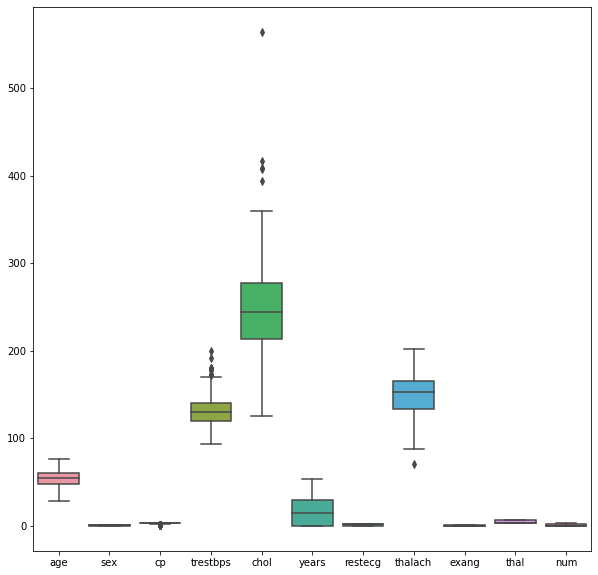

In [23]:
# plot boxplot to show outlier columns
f = plt.figure(figsize=(10, 10))
sns.boxplot(data=heart_df)

### Fixing outliers with quantile clipping. 

There are several methods for fixing outliers. They can be removed from the dataset, randomly assigned a value inside the distribution of the feature, or adjusted to match the highest and lowest values in the expected distribution of that feature. For the heart disease dataset, the third method will be used. This will retain all of the rows in the dataset and avoid injecting random noise into the variables. Adjusting outlier values to fit within the highest and lowest quantiles can be done using the pandas api.clip function. It will be applied to the trestbps, chol, and thalach features to move any values lower than the 0.05 quantile or higher than the 0.95 quantile back into the expected distribution of the dataset.


In [24]:
# use pandas clip function to trim outliers in specific columns
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.clip.html
# https://stackoverflow.com/questions/45721037/idiomatic-clip-on-quantile-for-dataframe
# https://stackoverflow.com/questions/55469020/how-to-clip-just-one-column-of-dataframe

#specify columns to clip 
cols = ['trestbps', 'chol','thalach']

#clip columns using qunatiles
heart_df[cols] = heart_df[cols].clip(heart_df.quantile(0.05), heart_df.quantile(0.95), axis=1)

C:\Users\adamg\AppData\Local\Temp\ipykernel_1180\585656686.py:10: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  heart_df[cols] = heart_df[cols].clip(heart_df.quantile(0.05), heart_df.quantile(0.95), axis=1)


<AxesSubplot:>

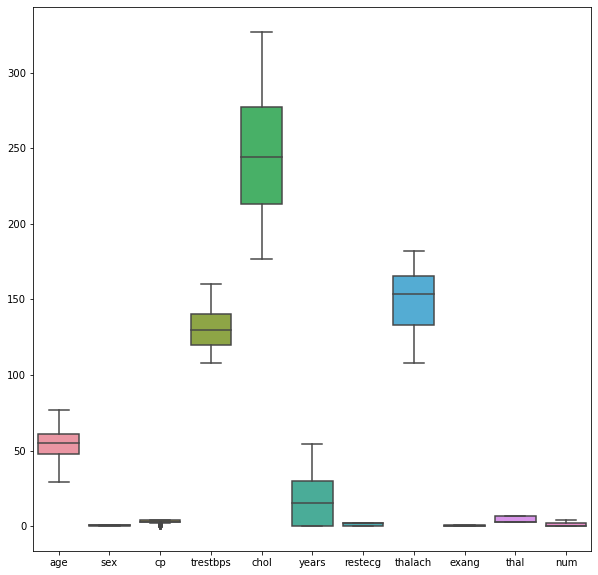

In [25]:
# plot to show removal of outliers
f = plt.figure(figsize=(10, 10))
sns.boxplot(data=heart_df)

# Feature Engineering: Descritizing Age

Numerical data with little significance in the difference of values can be broken into buckets to make it more meaningful. An example of this is age, where there is little difference between 29 and 30 years of age but is quite expressive when broken up by decade or generation. Information can be discretized in pandas using the .cut() function. It has been employed here on the dataset to break the age into 5 buckets. 

In [26]:
#discretize age
heart_df['age_bucket'] = pd.cut(heart_df['age'],5)

#encode columns
labelencoder= LabelEncoder()

#fit labels to age_bucket
heart_df['age_bucket'] = labelencoder.fit_transform(heart_df['age_bucket'])

#drop age column
heart_df.drop(labels=['age'],axis=1,inplace=True)

In [27]:
#display transformation
heart_df.head()

,sex,cp,trestbps,chol,years,restecg,thalach,exang,thal,num,age_bucket
0,1,1,145,233.0,20.0,2,150.00,0,6,0,3
1,1,4,160,286.0,40.0,2,108.05,1,3,2,3
2,1,4,120,229.0,35.0,2,129.00,1,7,1,3
3,1,3,130,250.0,0.0,0,181.95,0,3,0,0
4,0,2,130,204.0,0.0,2,172.00,0,3,0,1


In [28]:
binary_heart_df = heart_df

#age classifier function
def disease_classifier(row):
    
    if row.num == 0 :
        return 0
    else :
        return 1

#apply classifier to create binary disease column
binary_heart_df['disease'] = binary_heart_df.apply(disease_classifier, axis=1)

#drop num varible from dataset
binary_heart_df.drop(labels=['num'],axis=1,inplace=True)

# Save data to .csv for future use

The data can be exported to a .csv file for use in future machine learning applications with the code below.

In [29]:
#create csv of dataframe
binary_heart_df.to_csv('new_clean_heart_df', encoding='utf-8', index=False)

# Objective: Summarize and Justify Data Modifications
Several steps were taken to prepare the data for analysis by machine learning models.


#### EDA
EDA was performed to help understand the basic attributes of the data, items like the null information rate were calculated for model evaluation, and correlation graphs were drawn to help guide the process of imputing values and dropping features.

#### Imputing values.
A combination of methods was used to impute missing values in the dataset. 
 - In thal, where the number of missing values was very small (2 or less than 1%), the mode was chosen and inserted. This can be done for a small number of missing values without effecting the distribution of that feature.
 
- Cigs and years showed high correlation to other variables. These values could be imputed using the correlation from other features as a guide.


- Dm had low correlation to other variables, and with over 90% missing values, it was dropped entirely from the dataset. Imputing 90% of the values in this feature would have introduced programmer bias or random statistical noise in the dataset.

#### Dropping features.
After imputing values the cigs, fbs, and famhist features were dropped from the dataset. These items showed less than 5% correlation to the target variable. 5% is the threshold for statistical significance. Removing these items should boost the performance of machine learning algorithms on this dataset.

#### Dealing with outliers.
A boxplot was created to evaluate which features contained outliers. Any outliers above or below the 0.05 or 0.95 quantiles were adjusted to the highest or lowest value within the 0.05 and 0.95 quantiles. This method was chosen over removing values or randomly guessing them to avoid trimming down the data or injecting random noise into the dataset.

#### Feature Engineering
Age was discretized and transformed into a 5 variable feature. There is little difference between a 29 and 30 year old. The feature gains more significance when it is designed to represent a generation of people appearing in the dataset.


Care was taken not to adjust values in the num feature which will become the prediction target in future research. There is a significant class imbalance in this feature. It may need to be treated for class imbalance in future steps. One way to do this would be to change it to to a binary feature. The decision to convert this to binary will depend on the prediction objective of future tests. If the goal is to check for severity, the 5 classes will need to be retained. If the goal is to check for presence, it could be reduced to binary to address the class imbalance.<br>

The heart disease dataset is now ready for analysis and prediction by machine learning algorithms. <br>



# References
Janosi, A,. Steinbrunn, W., Pfisterer, M., & Detrano, R. (1988). <i>Heart Disease Data Set</i>. UCI Machine Learning Repository. Retrieved 08/02/2022 from http://archive.ics.uci.edu/ml/datasets/heart+Disease

Pandas Development Team. 2021. <i>Python API reference</i> from pandas.pydata.org https://pandas.pydata.org/docs/reference/index.html

Waskom ML (2021). seaborn: statistical data visualization. Journal of Open Source Software 6(60): 3021.a